### <center> US Airport Network </center> 

##### 0. Modules and Options

In [1]:
import altair as alt 
import pandas as pd 
import networkx as nx
from vega_datasets import data

alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

#### 1. Data

##### a. Airports
* Dataset contains of US airports. 
* **`iata`**, is a unique airport identifier provided by the **International Air Transport Association**. 
* Subsequent columns provide the airport name, location, including coordinates.

In [2]:
data.airports.description

'This dataset lists US airports, including airport code, city, state, latitude, and longitude. This dataset is a subset of the data compiled and published at http://ourairports.com/data/, and is in the public domain.'

In [3]:
airports = data.airports().set_index("iata")

In [4]:
airports.sample(n=3)

,name,city,state,country,latitude,longitude
iata,,,,,,
DKK,Dunkirk Municipal,Dunkirk,NY,USA,42.493335,-79.272042
0Q5,Shelter Cove,Shelter Cove,CA,USA,40.027643,-124.073364
7F6,Clarksville-Red River County,Clarksville,TX,USA,33.593165,-95.063555


In [5]:
len(airports)

3376

##### b. Flights

* This dataset contains flight information for the year 2008. 
* Each record contains the count of of flights alond this route.

In [6]:
flights = data.flights_airport()

In [7]:
flights.head()

,origin,destination,count
0,ABE,ATL,853
1,ABE,BHM,1
2,ABE,CLE,805
3,ABE,CLT,465
4,ABE,CVG,247


In [8]:
len(flights)

5366

##### c. Airport Distance

* We are also interested in airport distance (as a proxy to flight time). 
* We got this dataset from the [Bureau of Transportation Statistics](https://www.transtats.bts.gov/Distance.aspx)

In [9]:
airpost_distance = pd.read_csv("AIRPORT_DISTANCE.csv", 
                               usecols=["Origin Airport Code", "Dest Airport Code", "Distance (Miles)"]
                              ).rename(columns={"Origin Airport Code":"origin", "Dest Airport Code":"destination", "Distance (Miles)":"miles"}
                              ).groupby(["origin", "destination"]).agg({"miles":"mean"}).reset_index()
                               

In [10]:
len(airpost_distance)

1303578

In [54]:
airpost_distance.sample(n=20)

,origin,destination,miles
295957,DCA,RZE,4590.0
540282,IPT,NAS,1117.0
735656,MGM,PGA,1458.5
763085,MOB,MOD,1924.0
413965,GCC,MLU,1094.0
181502,BWN,VKO,5456.0
218073,CHO,OSA,6972.0
623250,LAN,EDL,7677.0
1111772,SZG,FLN,6445.0
394683,FNA,LED,4185.0


In [12]:
airpost_distance[(airpost_distance["origin"]=="ABE") & (airpost_distance["destination"]=="ATL")]

,origin,destination,miles
2225,ABE,ATL,692.0


**Join distance to airports dataset**

In [13]:
flights = pd.merge(flights, airpost_distance, on=['origin', 'destination'], how="left")

In [14]:
flights.sample(n=5)

,origin,destination,count,miles
5005,SMF,ORD,1077,1781.0
1853,FAI,SEA,956,1533.0
5297,TVC,DTW,1210,207.0
4373,RHI,MSP,221,190.0
1648,DTW,MCO,3481,957.0


In [15]:
len(flights)

5366

In [16]:
airports.head(2)

,name,city,state,country,latitude,longitude
iata,,,,,,
00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928


In [26]:
airports_dict = airports.to_dict("index")

In [27]:
airports_dict

{'00M': {'name': 'Thigpen',
  'city': 'Bay Springs',
  'state': 'MS',
  'country': 'USA',
  'latitude': 31.95376472,
  'longitude': -89.23450472},
 '00R': {'name': 'Livingston Municipal',
  'city': 'Livingston',
  'state': 'TX',
  'country': 'USA',
  'latitude': 30.68586111,
  'longitude': -95.01792778},
 '00V': {'name': 'Meadow Lake',
  'city': 'Colorado Springs',
  'state': 'CO',
  'country': 'USA',
  'latitude': 38.94574889,
  'longitude': -104.5698933},
 '01G': {'name': 'Perry-Warsaw',
  'city': 'Perry',
  'state': 'NY',
  'country': 'USA',
  'latitude': 42.74134667,
  'longitude': -78.05208056},
 '01J': {'name': 'Hilliard Airpark',
  'city': 'Hilliard',
  'state': 'FL',
  'country': 'USA',
  'latitude': 30.6880125,
  'longitude': -81.90594389},
 '01M': {'name': 'Tishomingo County',
  'city': 'Belmont',
  'state': 'MS',
  'country': 'USA',
  'latitude': 34.49166667,
  'longitude': -88.20111111},
 '02A': {'name': 'Gragg-Wade',
  'city': 'Clanton',
  'state': 'AL',
  'country': 'USA'

In [23]:
position = airports[['latitude', 'longitude']].agg(tuple,1).to_dict()

In [24]:
position

{'00M': (31.95376472, -89.23450472),
 '00R': (30.68586111, -95.01792778),
 '00V': (38.94574889, -104.5698933),
 '01G': (42.74134667, -78.05208056),
 '01J': (30.6880125, -81.90594389),
 '01M': (34.49166667, -88.20111111),
 '02A': (32.85048667, -86.61145333),
 '02C': (43.08751, -88.17786917),
 '02G': (40.67331278, -80.64140639),
 '03D': (40.44725889, -92.22696056),
 '04M': (33.93011222, -89.34285194),
 '04Y': (46.88384889, -96.35089861),
 '05C': (41.51961917, -87.40109333),
 '05F': (31.42127556, -97.79696778),
 '05U': (39.60416667, -116.0050597),
 '06A': (32.46047167, -85.68003611),
 '06C': (41.98934083, -88.10124278),
 '06D': (48.88434111, -99.62087694),
 '06M': (33.53456583, -89.31256917),
 '06N': (41.43156583, -74.39191722),
 '06U': (41.97602222, -114.6580911),
 '07C': (41.30716667, -85.06433333),
 '07F': (32.52883861, -94.97174556),
 '07G': (42.57450861, -84.81143139),
 '07K': (41.11668056, -98.05033639),
 '08A': (32.52943944, -86.32822139),
 '08D': (48.30079861, -102.4063514),
 '08K

In [25]:
airport_network = nx.from_pandas_edgelist(flights, source="origin", target="destination", edge_attr=["count", "miles"])

In [29]:
nx.set_node_attributes(airport_network, airports_dict)

In [30]:
airport_network.get_edge_data("ATL", "ROC")

{'count': 2488, 'miles': 749.0}

In [31]:
airport_network.nodes["ABE"]

{'name': 'Lehigh Valley International',
 'city': 'Allentown',
 'state': 'PA',
 'country': 'USA',
 'latitude': 40.65236278,
 'longitude': -75.44040167}

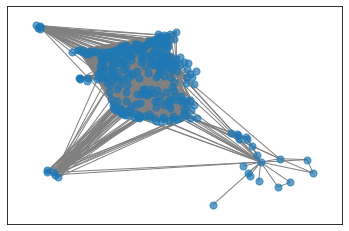

In [50]:
nx.draw_networkx_nodes(airport_network, position, node_size=50, alpha=0.7)
nx.draw_networkx_edges(airport_network, position, edge_color="grey")
# nx.draw_networkx_labels(airport_network, position, labels=airports_dict)

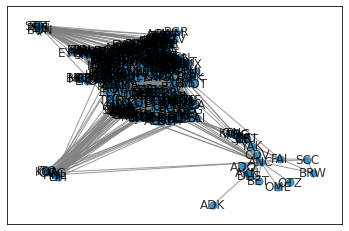

In [53]:
nx.draw_networkx(airport_network, pos=position, with_labels=True, node_size=50, edge_color="grey", alpha=0.8)

In [56]:
nx.shortest_path(airport_network, source="BUR", target="TVC", weight="miles", method="dijkstra")

['BUR', 'DEN', 'TVC']

In [58]:
import nx_altair as nxa

In [89]:
chart = nxa.draw_networkx(
    G=airport_network, 
    pos=position, 
    edge_color="grey",
    node_color="orange",
    node_size='count:N',
    node_tooltip=["name:N", "city:N", "state:N"]    
)

In [85]:
states = alt.topo_feature(data.us_10m.url, feature="states")

In [86]:
background = alt.Chart(states).mark_geoshape(fill="lightgray", stroke="white"
                                            ).properties(width=750, height=500)

In [90]:
(background + chart).project("albersUsa")

alt.LayerChart(...)